### Procedure for making OHLC candels

In [74]:
# Python 3.8.2 kernel
import pandas as pd
import numpy as np
import os
import json
import pandas_datareader.data as web   # my local kernel Python 3.10.7 
import matplotlib.pyplot as plt  # unavailable?  do: 1. pip uninstall matplotlib # 2. python3 -m pip install matplotlib
%matplotlib inline
plt.style.use('seaborn-darkgrid')
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import datetime
import io
import statsmodels.api as sm                             ####   reference print(sm.datasets.macrodata.NOTE) 
pd.set_option('display.max_columns', None)
import plotly.graph_objects as go
import seaborn as sns

### Import Final DS - - - from lr1 = specifically chosen linear run fitting linear regression analysis
- Read LR ds
- Create Input Parameters
- Create X and y Datasets


In [75]:
## procedural functions for OHLC candles
from functools import reduce

def merge_manyDF(df1, df2):
    data_frames = [df1, df2]
    df_merged = reduce(lambda  left, right: pd.merge(left, right, on='Date', how='outer'), data_frames)
    return df_merged

def resampling_10min(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 min'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('10min', on= on_name).max()             
    dfLow = df.resample('10min', on= on_name).min() 
    dfOpen = df.resample('10min', on= on_name).first() 
    dfClose = df.resample('10min', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_2Sec(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('2S', on= on_name).max()             
    dfLow = df.resample('2S', on= on_name).min() 
    dfOpen = df.resample('2S', on= on_name).first() 
    dfClose = df.resample('2S', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_10Sec(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('10S', on= on_name).max()             
    dfLow = df.resample('10S', on= on_name).min() 
    dfOpen = df.resample('10S', on= on_name).first() 
    dfClose = df.resample('10S', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_3Min(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('3T', on= on_name).max()             
    dfLow = df.resample('3T', on= on_name).min() 
    dfOpen = df.resample('3T', on= on_name).first() 
    dfClose = df.resample('3T', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_2Sec_BidAsk(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('2S', on= on_name).sum()             
    dfLow = df.resample('2S', on= on_name).sum() 
    dfOpen = df.resample('2S', on= on_name).sum() 
    dfClose = df.resample('2S', on= on_name).sum() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_1MinBidAsk(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('1T', on= on_name).sum()             
    dfLow = df.resample('1T', on= on_name).sum() 
    dfOpen = df.resample('1T', on= on_name).sum() 
    dfClose = df.resample('1T', on= on_name).sum() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_3MinBidAsk(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('3T', on= on_name).sum()             
    dfLow = df.resample('3T', on= on_name).sum() 
    dfOpen = df.resample('3T', on= on_name).sum() 
    dfClose = df.resample('3T', on= on_name).sum() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_1min(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 min'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('1min', on= on_name).max()             
    dfLow = df.resample('1min', on= on_name).min() 
    dfOpen = df.resample('1min', on= on_name).first() 
    dfClose = df.resample('1min', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def merge_DFs(d1, d2, d3):
    d = pd.DataFrame()
    d = pd.merge(d1, d2, on='Date')
    d = pd.merge(d, d3, on='Date')
    return d

In [76]:
lr1 = pd.read_csv('ES2022-09-19SecLR1.csv', index_col='Date' )
lr1.index = pd.to_datetime(lr1.index)
lr1['new_time'] = pd.to_datetime(lr1.index).astype('int64') / 100 ** 9
lr1['Date'] = lr1.index
lr1.head()


,Vol,BidAsk,Price,BidAskCum,new_time,Date
Date,,,,,,
2022-09-19 11:18:00,158,28,3899.25,3882,1.663586,2022-09-19 11:18:00
2022-09-19 11:18:01,98,6,3899.50,3888,1.663586,2022-09-19 11:18:01
2022-09-19 11:18:02,60,-10,3899.25,3878,1.663586,2022-09-19 11:18:02
2022-09-19 11:18:03,77,1,3899.25,3879,1.663586,2022-09-19 11:18:03
2022-09-19 11:18:04,8,8,3899.25,3887,1.663586,2022-09-19 11:18:04


In [77]:
lr1.shape
type(lr1.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [78]:
lr1_1min = resampling_2Sec(lr1['Price'], 'Price', lr1.Date, 'Date')  
mapping1M = {lr1_1min.columns[0]: 'Open', lr1_1min.columns[1]: 'High', lr1_1min.columns[2]: 'Low', lr1_1min.columns[3]: 'Close'}
lr1_1min = lr1_1min.rename(columns= mapping1M)
lr1_1min.head(2)
lr1_1min.shape  #   1 min = (21, 4)  

lr1Vol = resampling_2Sec_BidAsk(lr1['Vol'], 'Vol', lr1.Date, 'Date')
mapping1 = {lr1Vol.columns[1]: 'Vol'}
lr1Vol = lr1Vol.rename(columns= mapping1)
del lr1Vol['Vol_x_x']
del lr1Vol['Vol_y_y']
del lr1Vol['Vol_x_y']
lr1Vol.head(5)
lr1Vol.shape # (21, 4)

nqBidAsk1 = resampling_2Sec_BidAsk(lr1['BidAsk'], 'BidAsk', lr1.Date, 'Date')
mappingBA = {nqBidAsk1.columns[1]: 'BidAsk'}
nqBidAsk1 = nqBidAsk1.rename(columns= mappingBA)
del nqBidAsk1['BidAsk_x_x']
del nqBidAsk1['BidAsk_x_y']
del nqBidAsk1['BidAsk_y_y']
nqBidAsk1.sample(20)
nqBidAsk1.shape     # (21, 4)

lr1Min = merge_DFs(nqBidAsk1, lr1Vol, lr1_1min)
lr1Min.shape                                # (21, 6)
lr1Min.dropna(inplace=True)
lr1Min.shape     #     (21, 6)
lr1Min.sample(3)
# lr1Min.to_csv('2022-09-19_ES_1m_LR.csv')    # save 1 min LR OHLC set

,BidAsk,Vol,Open,High,Low,Close
Date,,,,,,
2022-09-19 11:25:12,-129,506,3889.50,3889.5,3889.00,3889.0
2022-09-19 11:26:46,46,124,3887.25,3887.5,3887.25,3887.5
2022-09-19 11:31:12,-59,429,3881.00,3881.0,3881.00,3881.0


In [84]:
lr1Min['new_time'] = pd.to_datetime(lr1Min.index).astype('int64') / 100 ** 9
lr1Min.head()

,BidAsk,Vol,Open,High,Low,Close,new_time
Date,,,,,,,
2022-09-19 11:18:00,34,256,3899.25,3899.50,3899.25,3899.50,1.663586
2022-09-19 11:18:02,-9,137,3899.25,3899.25,3899.25,3899.25,1.663586
2022-09-19 11:18:04,49,122,3899.25,3899.50,3899.25,3899.50,1.663586
2022-09-19 11:18:06,221,437,3899.75,3900.75,3899.75,3900.75,1.663586
2022-09-19 11:18:08,100,517,3901.25,3901.75,3901.25,3901.75,1.663586


In [89]:
lr1Min.shape

(601, 7)

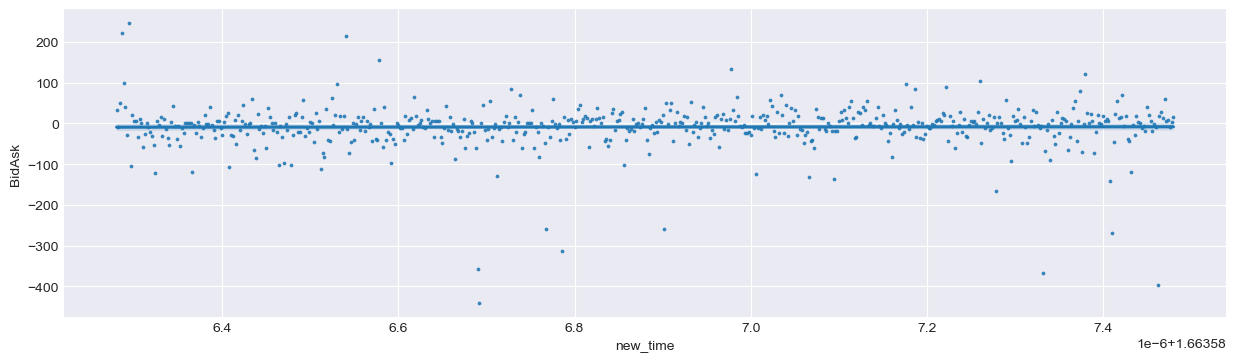

In [85]:
plt.figure(figsize=(15,4))   # lr1_1min
sns.regplot(x= 'new_time' , y= 'BidAsk', data= lr1Min, scatter_kws={"s": 3})

Conclusion: 
- `BidAsk is very slightly below 0 and this is Downward Linear Run. Could be true to extrapolate thatr in Upward Linear Runs BidAsk is slightly above 0?` 

Verify on different LR's!  

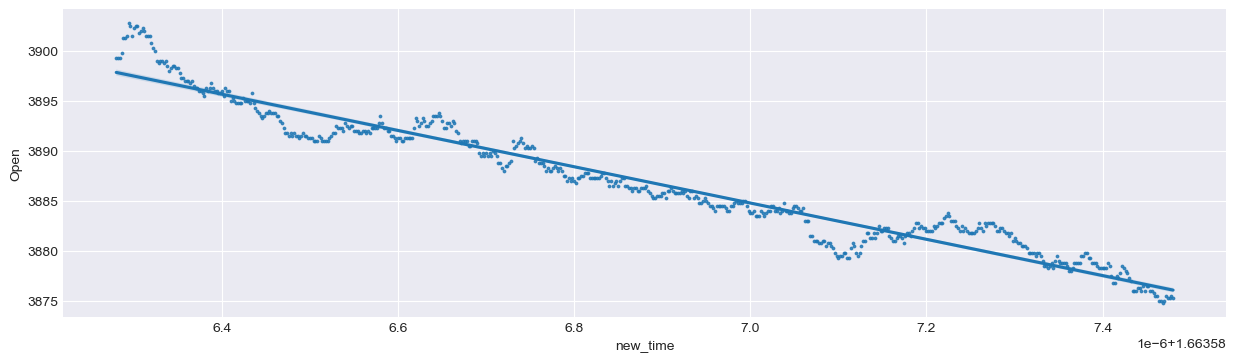

In [71]:
plt.figure(figsize=(15,4))
sns.regplot(x= 'new_time' , y= 'Open', data= lr1Min, scatter_kws={"s": 3})

In [86]:
lr1_1min = pd.read_csv(r"2022-09-19_ES_1m_LR.csv", index_col='Date')
lr1_1min.index = pd.to_datetime(lr1_1min.index)
lr1_1min.head()
# lr1_1min.shape
# lr1_1min['Close'].plot(figsize=(20,5) )

hovertext=[]
for i in range(len(lr1_1min['Open'])):
    hovertext.append('Open: '+ str(lr1_1min['Open'][i])+'<br>Close: '+ str(lr1_1min['Close'][i]))
    
fig = go.Figure(data= go.Ohlc(x= lr1_1min.index, open= lr1_1min['Open'], high= lr1_1min['High'],  
                low= lr1_1min['Low'], close= lr1_1min['Close'], text= hovertext, hoverinfo= 'text'))
fig.show()

In [98]:
lr1_1min.isna().sum()  # no NaN values
# lr1_1min.fillna(method='bfill', inplace=True)
# lr1_1min.fillna(method='ffill')

BidAsk      0
Vol         0
Open        0
High        0
Low         0
Close       0
new_time    0
S_2         0
S_4         0
S_6         0
dtype: int64

### Create Input Parameters

#### Create custom derived features, which will help in making the prediction.

- S_1, S_3, S_5: 1-min, 3-min and 5-min moving average for set from Close prices, respectively.
- Corr: Compute the correlation between the Close price and S_3.
- Std_U,Std_D: Difference between High & Open, Open & Low respectively.
- OD, OL: Difference between Open & previous minute's Open, and Open & previous minute's Close respectively.

In [107]:
lr1_1min.shape
# lr1_1min = lr1Min.copy()
# lr1_1min.columns

(601, 10)

In [161]:
# del lr1_1min['BA_5Cum'] 
# del lr1_1min['BA_1']
# del lr1_1min['BA_1SumMean']
lr1_1min.fillna(method='bfill', inplace=True)
lr1_1min['2022-09-19 11:17:00':'2022-09-19 11:37:00'].head(10)
# lr1_1min['2022-09-19 11:17:00':'2022-09-19 11:37:00'].tail(20)


,BidAsk,Vol,Open,High,Low,Close,new_time,BA_3,BA_5,BA_10,BA_CumSum,S_2,S_5,S_9
Date,,,,,,,,,,,,,,
2022-09-19 11:18:00,34,256,3899.25,3899.50,3899.25,3899.50,1.663586,24.666667,79.0,56.8,34,3899.375,3900.15,3900.972222
2022-09-19 11:18:02,-9,137,3899.25,3899.25,3899.25,3899.25,1.663586,24.666667,79.0,56.8,25,3899.375,3900.15,3900.972222
2022-09-19 11:18:04,49,122,3899.25,3899.50,3899.25,3899.50,1.663586,24.666667,79.0,56.8,74,3899.375,3900.15,3900.972222
2022-09-19 11:18:06,221,437,3899.75,3900.75,3899.75,3900.75,1.663586,87.000000,79.0,56.8,295,3900.125,3900.15,3900.972222
2022-09-19 11:18:08,100,517,3901.25,3901.75,3901.25,3901.75,1.663586,123.333333,79.0,56.8,395,3901.250,3900.15,3900.972222
2022-09-19 11:18:10,40,395,3901.25,3901.50,3901.25,3901.50,1.663586,120.333333,80.2,56.8,435,3901.625,3900.55,3900.972222
2022-09-19 11:18:12,-29,179,3901.50,3901.50,3901.50,3901.50,1.663586,37.000000,76.2,56.8,406,3901.500,3901.00,3900.972222
2022-09-19 11:18:14,246,927,3902.75,3902.75,3902.50,3902.50,1.663586,85.666667,115.6,56.8,652,3902.000,3901.60,3900.972222
2022-09-19 11:18:16,-105,511,3902.50,3902.50,3902.50,3902.50,1.663586,37.333333,50.4,56.8,547,3902.500,3901.95,3900.972222


In [142]:
# del lr1_1min['BA_3SumMean']
# del lr1_1min['BA_5SumMean']
# del lr1_1min['BA_9SumMean'] 

In [151]:
lr1_1min['BA_3'] =  lr1_1min['BidAsk'].rolling(3).mean()
lr1_1min['BA_5'] =  lr1_1min['BidAsk'].rolling(5).mean()
lr1_1min['BA_10'] =  lr1_1min['BidAsk'].rolling(10).mean()
lr1_1min['BA_CumSum'] = lr1_1min['BidAsk'].cumsum()

# lr1_1min['BA_3SumMean'] =  lr1_1min['BidAsk'].rolling(3).var() #* lr1_1min['Vol'].shift(10) 
# lr1_1min['BA_5SumMean'] =  lr1_1min['BidAsk'].rolling(5).var() #* lr1_1min['Vol'].shift(30) 
# lr1_1min['BA_9SumMean'] =  lr1_1min['BidAsk'].rolling(9).var() #* lr1_1min['Vol'].shift(50) 


In [159]:
# Calculate 2-min moving average of Close prices
lr1_1min['S_2'] = lr1_1min['Close'].rolling(2).mean()
# Calculate 5-min moving average of close prices
lr1_1min['S_5'] = lr1_1min['Close'].rolling(5).mean()

# Calculate 9-min moving average of Close prices
lr1_1min['S_9'] = lr1_1min['Close'].rolling(9).mean()

In [212]:
# Calculate correlation between Close price and 5-min moving average
lr1_1min['Corr'] = lr1_1min['Close'].shift(1).rolling(10).corr(lr1_1min['S_5'].shift(1))
lr1_1min['Corr2'] = lr1_1min['Close'].shift(1).rolling(10).corr(lr1_1min['S_9'].shift(1))

In [164]:
# Calculate the difference between High & Open, Open & Low
lr1_1min['Std_U'] = lr1_1min['High'] - lr1_1min['Open']
lr1_1min['Std_D'] = lr1_1min['Open'] - lr1_1min['Low']


In [165]:
# Calculate the difference between `Open` & previous min `Open`, and `Open` & previous min `Close`
lr1_1min['OD'] = lr1_1min['Open'] - lr1_1min['Open'].shift(1)
lr1_1min['OL'] = lr1_1min['Open'] - lr1_1min['Close'].shift(1)

In [216]:
lr1_1min.fillna(method='bfill', inplace=True)
lr1_1min.replace([np.inf, -np.inf], 0, inplace=True)
lr1_1min.head(3)


,BidAsk,Vol,Open,High,Low,Close,new_time,BA_3,BA_5,BA_10,BA_CumSum,S_2,S_5,S_9,Corr,Corr2,Std_U,Std_D,OD,OL
Date,,,,,,,,,,,,,,,,,,,,
2022-09-19 11:18:00,34,256,3899.25,3899.50,3899.25,3899.50,1.663586,24.666667,79.0,56.8,34,3899.375,3900.15,3900.972222,0.789045,0.316707,0.25,0.0,0.0,-0.25
2022-09-19 11:18:02,-9,137,3899.25,3899.25,3899.25,3899.25,1.663586,24.666667,79.0,56.8,25,3899.375,3900.15,3900.972222,0.789045,0.316707,0.00,0.0,0.0,-0.25
2022-09-19 11:18:04,49,122,3899.25,3899.50,3899.25,3899.50,1.663586,24.666667,79.0,56.8,74,3899.375,3900.15,3900.972222,0.789045,0.316707,0.25,0.0,0.0,0.00


In [217]:
lr1_1min.columns

Index(['BidAsk', 'Vol', 'Open', 'High', 'Low', 'Close', 'new_time', 'BA_3',
       'BA_5', 'BA_10', 'BA_CumSum', 'S_2', 'S_5', 'S_9', 'Corr', 'Corr2',
       'Std_U', 'Std_D', 'OD', 'OL'],
      dtype='object')

### Create X and y Datasets

In [218]:
# Independent variables
X = lr1_1min[['Open', 'BA_3', 'BA_5', 'BA_10', 'BA_CumSum', 'S_2', 'S_5', 'S_9', 'Corr', 'Corr2']]
X.tail()
# X.shape   #  (21, 7)

,Open,BA_3,BA_5,BA_10,BA_CumSum,S_2,S_5,S_9,Corr,Corr2
Date,,,,,,,,,,
2022-09-19 11:37:52,3875.50,25.666667,24.6,-29.5,-5179,3875.500,3875.15,3875.333333,0.785101,0.715118
2022-09-19 11:37:54,3875.25,24.000000,22.4,-29.4,-5171,3875.375,3875.20,3875.277778,0.670391,0.545022
2022-09-19 11:37:56,3875.25,1.333333,15.2,-28.4,-5180,3875.250,3875.30,3875.194444,0.574428,0.419882
2022-09-19 11:37:58,3875.50,0.666667,13.2,-28.0,-5177,3875.375,3875.40,3875.194444,0.478097,0.276078
2022-09-19 11:38:00,3875.25,3.666667,4.8,-25.4,-5160,3875.375,3875.35,3875.222222,0.052560,-0.291007


In [219]:
# Dependent variable for upward deviation
yU = lr1_1min['Std_U']
yU.sample(10)

Date
2022-09-19 11:30:56    0.25
2022-09-19 11:24:32    0.00
2022-09-19 11:28:42    0.00
2022-09-19 11:26:00    0.00
2022-09-19 11:25:24    0.00
2022-09-19 11:21:40    0.25
2022-09-19 11:27:26    0.00
2022-09-19 11:26:06    0.00
2022-09-19 11:20:18    0.25
2022-09-19 11:34:02    0.00
Name: Std_U, dtype: float64

In [220]:
# Dependent variable for downward deviation
yD = lr1_1min['Std_D']
yD.sample(5)
# yD.shape    # (21,)

Date
2022-09-19 11:26:14    0.0
2022-09-19 11:26:58    0.0
2022-09-19 11:19:18    0.0
2022-09-19 11:35:56    0.0
2022-09-19 11:20:10    0.0
Name: Std_D, dtype: float64

In [107]:
# lr1_1min.to_csv('lr1_1min_input_parameters.csv', index = True)

### DS Processing for Modeling

In [221]:
# Machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Import the libraries
import numpy as np
import pandas as pd

# For Plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# To ignore unwanted warnings
import warnings
warnings.filterwarnings("ignore")

In [222]:
#  check NaN ?
lr1_1min.isna().sum()

BidAsk       0
Vol          0
Open         0
High         0
Low          0
Close        0
new_time     0
BA_3         0
BA_5         0
BA_10        0
BA_CumSum    0
S_2          0
S_5          0
S_9          0
Corr         0
Corr2        0
Std_U        0
Std_D        0
OD           0
OL           0
dtype: int64

In [223]:
# Dropp all NaN values
lr1_1min.dropna(inplace=True)

# Checking NaN values
lr1_1min.isna().sum()
lr1_1min.shape    # (16, 14)   these 16 samples represent very scarce dataset. It would be better , perhaps to make a 2 seconds df. Proceed, having in mind
# that it's an analysis from limited dataset-  model this  1 min set; later to expand and make the same analysis on 2  or 1 second df.

(601, 20)

In [224]:
lr1_1min.shape    # (16, 14)

(601, 20)

In [225]:
# Independent variables
X = lr1_1min[['Open', 'BA_3', 'BA_5', 'BA_10', 'BA_CumSum', 'S_2', 'S_5', 'S_9', 'Corr', 'Corr2']]

# Dependent variable for upward deviation
yU = lr1_1min['Std_U']

# Dependent variable for downward deviation
yD = lr1_1min['Std_D']

In [226]:
X.head(5)

,Open,BA_3,BA_5,BA_10,BA_CumSum,S_2,S_5,S_9,Corr,Corr2
Date,,,,,,,,,,
2022-09-19 11:18:00,3899.25,24.666667,79.0,56.8,34,3899.375,3900.15,3900.972222,0.789045,0.316707
2022-09-19 11:18:02,3899.25,24.666667,79.0,56.8,25,3899.375,3900.15,3900.972222,0.789045,0.316707
2022-09-19 11:18:04,3899.25,24.666667,79.0,56.8,74,3899.375,3900.15,3900.972222,0.789045,0.316707
2022-09-19 11:18:06,3899.75,87.000000,79.0,56.8,295,3900.125,3900.15,3900.972222,0.789045,0.316707
2022-09-19 11:18:08,3901.25,123.333333,79.0,56.8,395,3901.250,3900.15,3900.972222,0.789045,0.316707


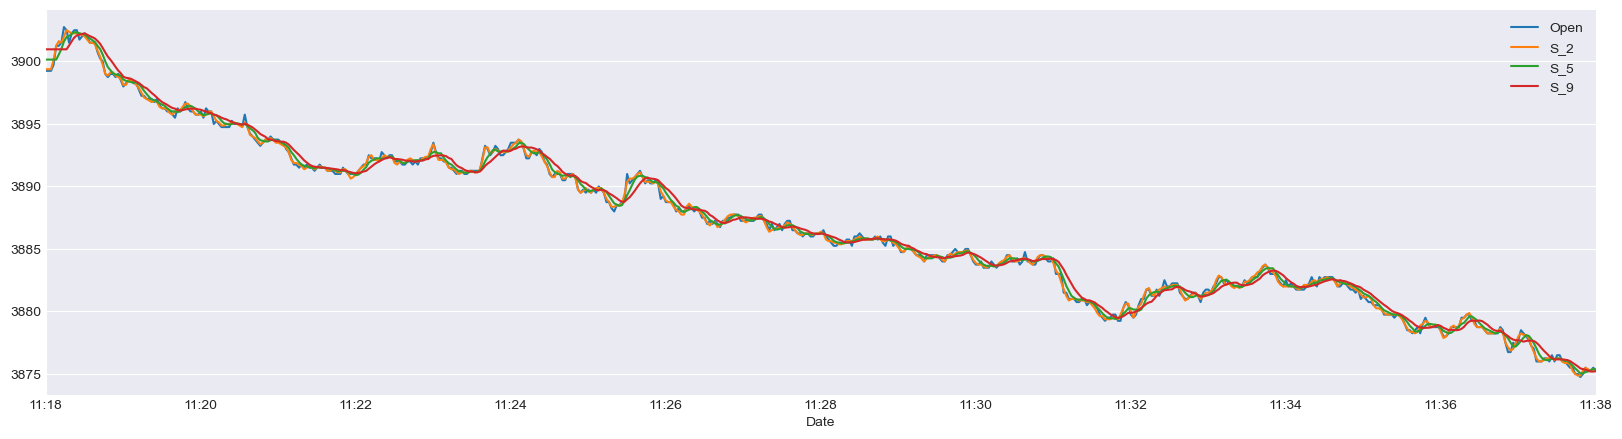

In [227]:
X[['Open' , 'S_2', 'S_5', 'S_9']].plot(figsize=(20,5) )

### Data Preprocessing, Scaling, Pipeline, Hyperparameters, Linear Regression

In [228]:
# Put scaling and then linear regression in the pipeline.
steps = [('scaler', StandardScaler()),
         ('linear', LinearRegression())]

# Defining pipeline
pipeline = Pipeline(steps)

In [229]:
# Use intercept as hyperparameter
parameters = {'linear__fit_intercept': [0, 1]}

### Grid Search Cross-Validation

In [230]:
# Use TimeSeriesSplit for cross validation
my_cv = TimeSeriesSplit(n_splits= 7)

# Define reg as variable for GridSearch function containing pipeline, hyperparameters
reg = GridSearchCV(pipeline, parameters, cv= my_cv)

### Split Train and Test Data

In [232]:
spilitting_ratio = .70

# Splitt data into two parts
split = int(spilitting_ratio * len(lr1_1min))

# Define train dataset
X_train = X[:split]
yU_train = yU[:split]
yD_train = yD[:split]

# Define test data
X_test = X[split:]

### Prediction

In [233]:
# Fit the model
reg.fit(X_train, yU_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=7, test_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('linear', LinearRegression())]),
             param_grid={'linear__fit_intercept': [0, 1]})

In [234]:
# Print best parameter
print(reg.best_params_)

{'linear__fit_intercept': 1}


In [235]:
# Predict the upward deviation
yU_predict = reg.predict(X_test)
# yU_predict

In [236]:
# Fit the model
reg.fit(X_train, yD_train)

# Print best parameter
print(reg.best_params_)

# Predict the downward deviation
yD_predict = reg.predict(X_test)

{'linear__fit_intercept': 1}


- Create `yU_predict` and `yD_predict` columns in the `X_test`. Formulas for upward deviation and downward deviation are:

1.  Upward deviation  = High - Open

2.  Downward deviation = Open - Low

Upward and Downward deviation can not be negative. So, we replace negative values with zero.


In [237]:
# Create new column in X_test
X_test['yU_predict'] = yU_predict
X_test['yD_predict'] = yD_predict

# Assign zero to all negative predicted values to take into account real life conditions
X_test.loc[X_test['yU_predict'] < 0, 'yU_predict'] = 0
X_test.loc[X_test['yD_predict'] < 0, 'yD_predict'] = 0

In [238]:
# Add open values in ['yU_predict'] to get the predicted high column
X_test['P_H'] = X_test['Open'] + X_test['yU_predict']

# Subtract ['yD_predict'] values in open to get the predicted low column.
X_test['P_L'] = X_test['Open'] - X_test['yD_predict']
X_test.tail()

,Open,BA_3,BA_5,BA_10,BA_CumSum,S_2,S_5,S_9,Corr,Corr2,yU_predict,yD_predict,P_H,P_L
Date,,,,,,,,,,,,,,
2022-09-19 11:37:52,3875.50,25.666667,24.6,-29.5,-5179,3875.500,3875.15,3875.333333,0.785101,0.715118,0.130951,0.000000,3875.630951,3875.500000
2022-09-19 11:37:54,3875.25,24.000000,22.4,-29.4,-5171,3875.375,3875.20,3875.277778,0.670391,0.545022,0.161609,0.000000,3875.411609,3875.250000
2022-09-19 11:37:56,3875.25,1.333333,15.2,-28.4,-5180,3875.250,3875.30,3875.194444,0.574428,0.419882,0.062120,0.049519,3875.312120,3875.200481
2022-09-19 11:37:58,3875.50,0.666667,13.2,-28.0,-5177,3875.375,3875.40,3875.194444,0.478097,0.276078,0.002041,0.115417,3875.502041,3875.384583
2022-09-19 11:38:00,3875.25,3.666667,4.8,-25.4,-5160,3875.375,3875.35,3875.222222,0.052560,-0.291007,0.121925,0.005418,3875.371925,3875.244582


In [239]:
# Copy columns from ds prices to X_test
X_test[['Close', 'High', 'Low']] = lr1_1min[['Close', 'High', 'Low']][split:]
X_test.tail()

,Open,BA_3,BA_5,BA_10,BA_CumSum,S_2,S_5,S_9,Corr,Corr2,yU_predict,yD_predict,P_H,P_L,Close,High,Low
Date,,,,,,,,,,,,,,,,,
2022-09-19 11:37:52,3875.50,25.666667,24.6,-29.5,-5179,3875.500,3875.15,3875.333333,0.785101,0.715118,0.130951,0.000000,3875.630951,3875.500000,3875.50,3875.50,3875.50
2022-09-19 11:37:54,3875.25,24.000000,22.4,-29.4,-5171,3875.375,3875.20,3875.277778,0.670391,0.545022,0.161609,0.000000,3875.411609,3875.250000,3875.25,3875.25,3875.25
2022-09-19 11:37:56,3875.25,1.333333,15.2,-28.4,-5180,3875.250,3875.30,3875.194444,0.574428,0.419882,0.062120,0.049519,3875.312120,3875.200481,3875.25,3875.25,3875.25
2022-09-19 11:37:58,3875.50,0.666667,13.2,-28.0,-5177,3875.375,3875.40,3875.194444,0.478097,0.276078,0.002041,0.115417,3875.502041,3875.384583,3875.50,3875.50,3875.50
2022-09-19 11:38:00,3875.25,3.666667,4.8,-25.4,-5160,3875.375,3875.35,3875.222222,0.052560,-0.291007,0.121925,0.005418,3875.371925,3875.244582,3875.25,3875.25,3875.25


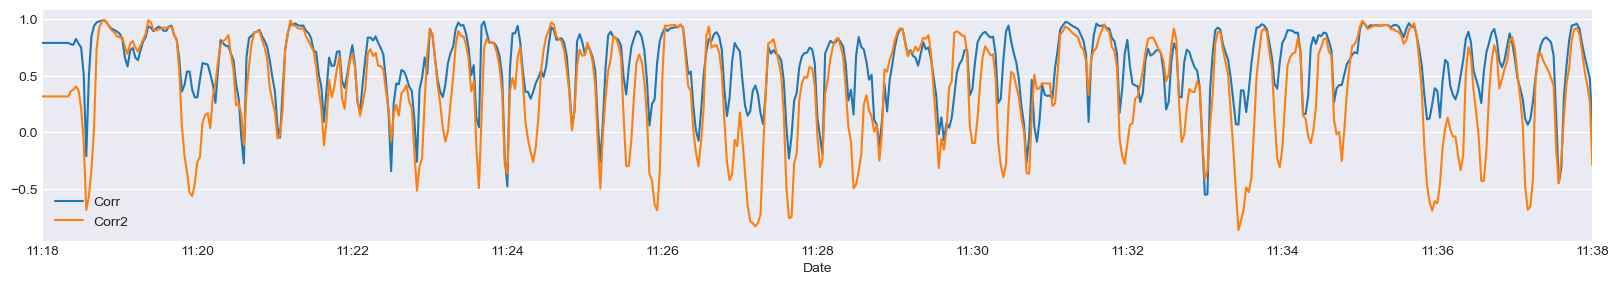

In [240]:
X[[ 'Corr', 'Corr2']].plot(figsize=(20,3) )  # # THIS CORR2 IS:  lr1_1min['Close'].shift(1).rolling(10).corr(lr1_1min['S_9'].shift(1))

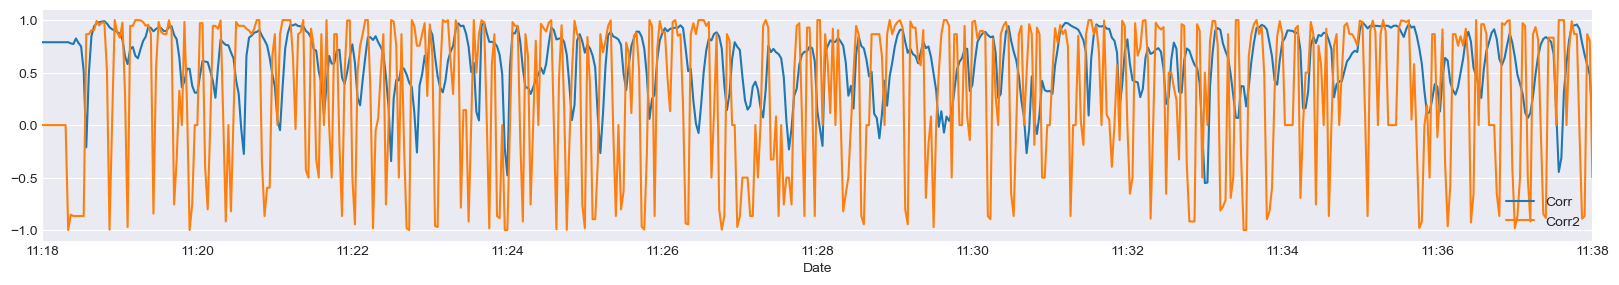

In [211]:
X[[ 'Corr', 'Corr2']].plot(figsize=(20,3) ) # THIS CORR2 IS:  lr1_1min['Close'].shift(1).rolling(3).corr(lr1_1min['S_9'].shift(1))

### VERIFY IF DOWNWARD RUN HAVE OPPOSITE PREPONDERANCE (BELLOW 0) 

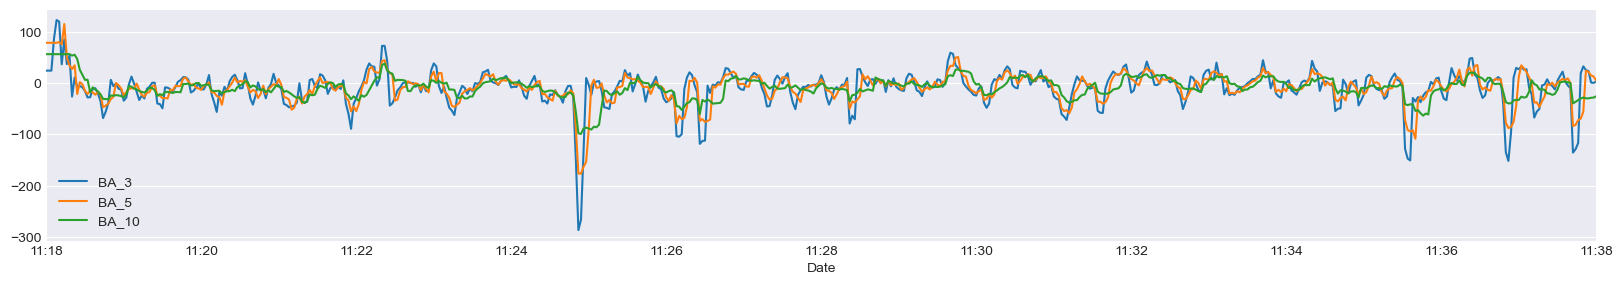

In [241]:
X[['BA_3',	'BA_5',	'BA_10']].plot(figsize=(20,3))    

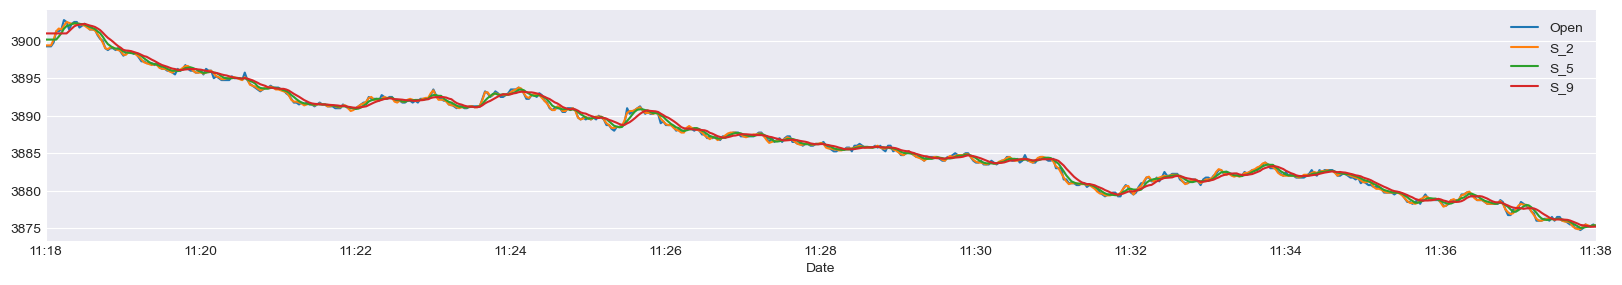

In [210]:
X[['Open' , 'S_2', 'S_5', 'S_9']].plot(figsize=(20,3) )

#### Conclusion: Corr is above mainly between 1 & 0 in this clearly Downward LR. Can we expect that it will be below 0 (between -1 & 0) in a clearly Upward Run?

In [242]:
# Store the data for further metrics analysis
X_test[['Close', 'High','P_H', 'Low', 'P_L']].to_csv('test_dataset_pred_high_low_LR1.csv', index = True)

###  Strategy Analytics

In [244]:
import numpy as np
import pandas as pd
# For Plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid') 
import warnings
warnings.filterwarnings("ignore")

In [246]:
# Importing the data
test_dataset = pd.read_csv('test_dataset_pred_high_low_LR1.csv', index_col='Date')

# Converting index into datetime format
test_dataset.index = pd.to_datetime(test_dataset.index)

# Printing the tail of test_dataset
test_dataset.tail()

,Close,High,P_H,Low,P_L
Date,,,,,
2022-09-19 11:37:52,3875.50,3875.50,3875.630951,3875.50,3875.500000
2022-09-19 11:37:54,3875.25,3875.25,3875.411609,3875.25,3875.250000
2022-09-19 11:37:56,3875.25,3875.25,3875.312120,3875.25,3875.200481
2022-09-19 11:37:58,3875.50,3875.50,3875.502041,3875.50,3875.384583
2022-09-19 11:38:00,3875.25,3875.25,3875.371925,3875.25,3875.244582


### Signal Generation

In [247]:
# Initialise signal column to be zero
test_dataset['Signal'] = 0

# When buying, assigning signal value as +1  UPWARD EXPECTATION
test_dataset.loc[(test_dataset['High'] > test_dataset['P_H']) & ( test_dataset['Low'] > test_dataset['P_L']), 'Signal'] = 1

# When selling, assigning signal value as -1  DOWNWARD EXPECTATION
test_dataset.loc[(test_dataset['High'] < test_dataset['P_H']) & ( test_dataset['Low'] < test_dataset['P_L']), 'Signal'] = -1


### Strategy Returns metrics

In [ ]:
#### The below function returns the Sharpe ratio for the excess returns
# def annualized_sharpe_ratio(returns, N= 252):
#     return np.sqrt(N) * returns.mean() / returns.std()

#### The below function returns the Sharpe ratio for a daily or limited run of the excess returns
def daily_sharpe_ratio(returns, N= 20): 
    ''' this particular run will have max 20 minutes with 1 trade per minute limit N = 20'''
    return np.sqrt(N) * returns.mean() / returns.std()

#### Calculate the excess daily return by assuming an annual risk free rate of return of 5%
# excess_daily_strategy_return = strategy_data['strategy_returns'] - 0.05 / 252

#### our daily or limited run excess return by assuming a daily risk free rate of return of 0.01%
excess_strategy_return = strategy_data['strategy_returns'] - 0.01 / 20

#### Calculate the annualized Sharpe ratio
# sharpe = annualized_sharpe_ratio(excess_daily_strategy_return)
# print('Sharpe', sharpe)

#### Calculate the day/limited Run  Sharpe ratio
sharpe = daily_sharpe_ratio(excess_strategy_return)
print('Sharpe', sharpe)

In [250]:
# Compute returns
test_dataset['asset1_returns'] = test_dataset['Close'].pct_change()

# Compute strategy returns
test_dataset['strategy_returns'] = test_dataset['asset1_returns'] *  (test_dataset['Signal'].shift(1))

# Printing tail of the test_dataset
test_dataset.tail()

# Save the test_dataset as ml_regression_asset1min_strategy_data.csv for further analysis
test_dataset.to_csv('ml_regression_es_strategy_data.csv', index = True)

### Plot

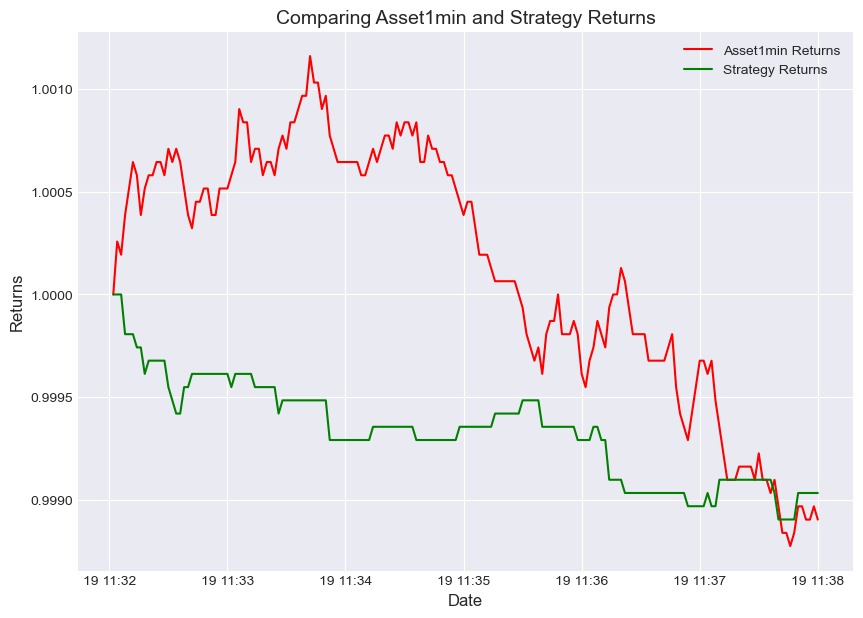

In [251]:
plt.figure(figsize=(10, 7))

# Plotting gld_returns
plt.plot(((test_dataset['asset1_returns'][:]+1).cumprod()),
         color='r', label='Asset1min Returns')

# Plotting test_dataset
plt.plot(((test_dataset['strategy_returns'][:]+1).cumprod()),
         color='g', label='Strategy Returns')

# x-labeling
plt.xlabel('Date', fontsize=12)

# y-labeling
plt.ylabel('Returns', fontsize=12)

# Titlename
plt.title('Comparing Asset1min and Strategy Returns', fontsize=14)
plt.legend()
plt.show()

### Performance Analysis

In [ ]:
!pip install pyfolio

In [254]:
import pandas as pd
import numpy as np

# For Plotting
import matplotlib.pyplot as plt
%matplotlib inline

# To ignore unwanted warnings
import warnings
warnings.filterwarnings("ignore")

#For strategy analysis
import pyfolio as pf

In [253]:
strategy_data = pd.read_csv( 'ml_regression_es_strategy_data.csv', parse_dates=['Date'], index_col='Date')
strategy_data.head()

,Close,High,P_H,Low,P_L,Signal,asset1_returns,strategy_returns
Date,,,,,,,,
2022-09-19 11:32:00,3879.50,3879.75,3879.851840,3879.50,3879.750000,-1,NaN,NaN
2022-09-19 11:32:02,3879.50,3879.50,3879.500000,3879.50,3879.392640,0,0.000000,-0.000000
2022-09-19 11:32:04,3880.50,3880.50,3879.898653,3879.75,3879.750000,0,0.000258,0.000000
2022-09-19 11:32:06,3880.25,3880.50,3880.550626,3880.25,3880.386913,-1,-0.000064,-0.000000
2022-09-19 11:32:08,3881.00,3881.00,3881.000000,3881.00,3880.782118,0,0.000193,-0.000193


- Sharpe Ratio: a measure of the risk-adjusted return of an investment or trading strategy. 
- It is generally considered that a Sharpe ratio of 1 or higher is good, while a Sharpe ratio below 1 may not be considered as attractive.

In [256]:
# The below function returns the Sharpe ratio for the excess returns
def annualized_sharpe_ratio(returns, N= 20):
    return np.sqrt(N) * returns.mean() / returns.std()


# Calculate the excess daily return by assuming an daily risk free rate of return of 5%
excess_daily_strategy_return = strategy_data['strategy_returns'] - 0.01 / 20

# Calculate the annualized Sharpe ratio
sharpe = annualized_sharpe_ratio(excess_daily_strategy_return)
print('Sharpe', sharpe)

Sharpe -52.55006255981854


## NOT GOOD sHARPE RATIO

In [257]:
def get_trades(data, close_column, signal_column):
    """Function to generate trade details
    """
    # Intializing trades dataframe
    trades = pd.DataFrame()

    # There are no current positions open at the beginning
    current_position = 0

    # Creating an empty string for entry_date
    entry_date = ''

    for i in data.index:

        # Save the signal generated on date i in 'new_position'
        new_position = data.loc[i, signal_column]

        # We don't take any action if the current_position is equal to the signal generated at date i.
        # The below code will run if the signal generated is not equal to current_position.
        if new_position != current_position:

            # The below code will run if the entry_date is not empty
            if entry_date != '':

                # save entry price in entry_price
                entry_price = data.loc[entry_date, close_column]

                # Since the signal and current_position are not equal, we exit the position at date i
                exit_date = i

                # Save exit price in exit_price
                exit_price = data.loc[exit_date, close_column]

                # Create a dataframe trade_details with trade details
                trade_details = pd.DataFrame(
                    [(current_position, entry_date, entry_price, exit_date, exit_price)])

                # Update the trades dataframe in every loop
                trades = trades.append(trade_details, ignore_index=True)

                # Reset the entry_date
                entry_date = ''

            # If the new_position i.e. signal generated at i is not '0' and also not equal to current_position, we will enter either short or long trade
            if new_position != 0:

                # Save entry date of trade in entry_date
                entry_date = i

            # Update the current_position with signal generated on date i
            current_position = new_position

    # Creating below five columns in trades dataframe.
    trades.columns = ['Position', 'Entry Date',
                      'Entry Price', 'Exit Date', 'Exit Price']

    # Create a column in trades dataframe to store the profit and loss from each trade
    trades['PnL'] = (trades['Exit Price'] -
                     trades['Entry Price']) * trades['Position']

    # Returns 'trades' dataframe
    return trades

In [258]:
def get_analytics(trades):
    """Function to generate strategy analytics
    """

    analytics = pd.DataFrame(index=['Strategy'])
    # Number of long trades
    analytics['num_of_long'] = len(trades.loc[trades.Position == 1])
    # Number of short trades
    analytics['num_of_short'] = len(trades.loc[trades.Position == -1])
    # Total number of trades
    analytics['total_trades'] = analytics.num_of_long + analytics.num_of_short

    # Gross Profit
    analytics['gross_profit'] = trades.loc[trades.PnL > 0].PnL.sum()
    # Gross Loss
    analytics['gross_loss'] = trades.loc[trades.PnL < 0].PnL.sum()

    # Net Profit
    analytics['net_profit'] = trades.PnL.sum()

    # Profitable trades
    analytics['winners'] = len(trades.loc[trades.PnL > 0])
    # Loss-making trades
    analytics['losers'] = len(trades.loc[trades.PnL <= 0])
    # Win percentage
    analytics['win_percentage'] = 100*analytics.winners/analytics.total_trades
    # Loss percentage
    analytics['loss_percentage'] = 100*analytics.losers/analytics.total_trades
    # Per trade profit/loss of winning trades
    analytics['per_trade_PnL_winners'] = trades.loc[trades.PnL > 0].PnL.mean()
    # Per trade profit/loss of losing trades
    analytics['per_trade_PnL_losers'] = trades.loc[trades.PnL <= 0].PnL.mean()

    return analytics.T

In [259]:
# Using get_trades function to evaluate trades detail
trades = get_trades(strategy_data, 'Close', 'Signal')
print('Trade Details')

# Printing trades dataframe
trades.head(5)

Trade Details


,Position,Entry Date,Entry Price,Exit Date,Exit Price,PnL
0,-1,2022-09-19 11:32:00,3879.50,2022-09-19 11:32:02,3879.50,-0.00
1,-1,2022-09-19 11:32:06,3880.25,2022-09-19 11:32:08,3881.00,-0.75
2,1,2022-09-19 11:32:12,3882.00,2022-09-19 11:32:14,3881.75,-0.25
3,-1,2022-09-19 11:32:16,3881.00,2022-09-19 11:32:18,3881.50,-0.50
4,1,2022-09-19 11:32:18,3881.50,2022-09-19 11:32:20,3881.75,0.25


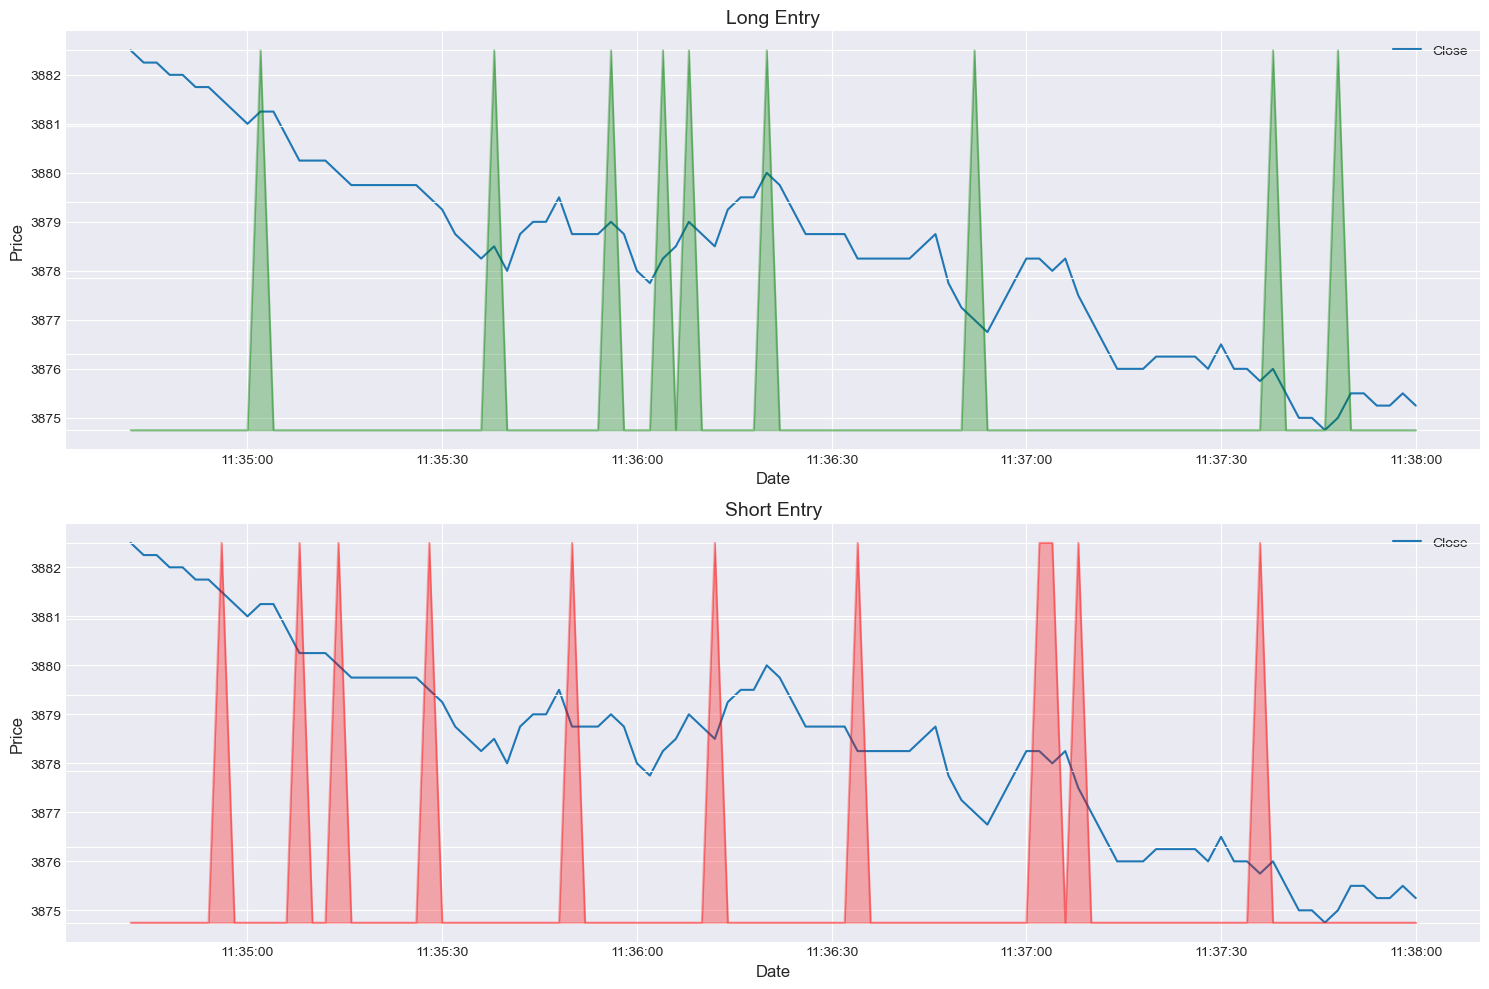

In [260]:
import matplotlib.pyplot as plt

# Showing the last 100 points for illustration purpose
test_dataset_for_plot = strategy_data[-100:]

# When signal is 1 we take long entry
test_dataset_for_plot['long_entry'] = test_dataset_for_plot.Signal == 1

# When signal is -1 we take short entry
test_dataset_for_plot['short_entry'] = test_dataset_for_plot.Signal == -1

fig = plt.figure(figsize=(15, 10))

# Sub plot for the long entry
ax = fig.add_subplot(211)

# Plotting close price
ax.plot(test_dataset_for_plot['Close'], label='Close')

# Set the title and axis labels
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price', fontsize=12)
ax.set_title('Long Entry', fontsize=14)
ax.legend()


# Twinx() creates a new axes with an invisible x-axis and y axis positioned opposite to the original one
ax2 = ax.twinx()

# Plotting long entry
ax2.plot(test_dataset_for_plot['long_entry'], color='g', alpha=0.3)
ax2.fill_between(test_dataset_for_plot['long_entry'].index,
                 test_dataset_for_plot['long_entry'].values, color='g', alpha=0.3)
ax2.tick_params(labelright=False)

# Sub plot for the short position
ax = fig.add_subplot(212)

# Plot the close price
ax.plot(test_dataset_for_plot['Close'], label='Close')


# Set the title and axis labels
ax.set_title('Short Entry', fontsize=14)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price', fontsize=12)
ax.legend()

# Plotting short entry
ax2 = ax.twinx()
ax2.plot(test_dataset_for_plot['short_entry'], color='r', alpha=0.3)
ax2.fill_between(test_dataset_for_plot['short_entry'].index,
                 test_dataset_for_plot['short_entry'].values, color='r', alpha=0.3)
ax2.tick_params(labelright=False)

plt.tight_layout()
plt.show()

In [261]:
# Calling get_analytics to analyse trades
analytics = get_analytics(trades)
print('Trade Analytics')

# Rounding off to two decimal places
round(analytics, 2)

Trade Analytics


,Strategy
num_of_long,18.00
num_of_short,23.00
total_trades,41.00
gross_profit,3.75
gross_loss,-7.50
net_profit,-3.75
winners,12.00
losers,29.00
win_percentage,29.27
loss_percentage,70.73


In [262]:
# Calculating close price change percentage
strategy_data['returns'] = strategy_data.Close.pct_change()

# Strategy return depends on the last day signal
strategy_data['strategy_returns'] = strategy_data['returns'] * strategy_data['Signal'].shift(1)
strategy_data.head()

,Close,High,P_H,Low,P_L,Signal,asset1_returns,strategy_returns,returns
Date,,,,,,,,,
2022-09-19 11:32:00,3879.50,3879.75,3879.851840,3879.50,3879.750000,-1,NaN,NaN,NaN
2022-09-19 11:32:02,3879.50,3879.50,3879.500000,3879.50,3879.392640,0,0.000000,-0.000000,0.000000
2022-09-19 11:32:04,3880.50,3880.50,3879.898653,3879.75,3879.750000,0,0.000258,0.000000,0.000258
2022-09-19 11:32:06,3880.25,3880.50,3880.550626,3880.25,3880.386913,-1,-0.000064,-0.000000,-0.000064
2022-09-19 11:32:08,3881.00,3881.00,3881.000000,3881.00,3880.782118,0,0.000193,-0.000193,0.000193


### Strategy Analysis

Start date,2022-09-19
End date,2022-09-19
Total months,8
,Backtest
Annual return,-0.1%
Cumulative returns,-0.1%
Annual volatility,0.1%
Sharpe ratio,-1.98
Calmar ratio,-1.23
Stability,0.81
Max drawdown,-0.1%


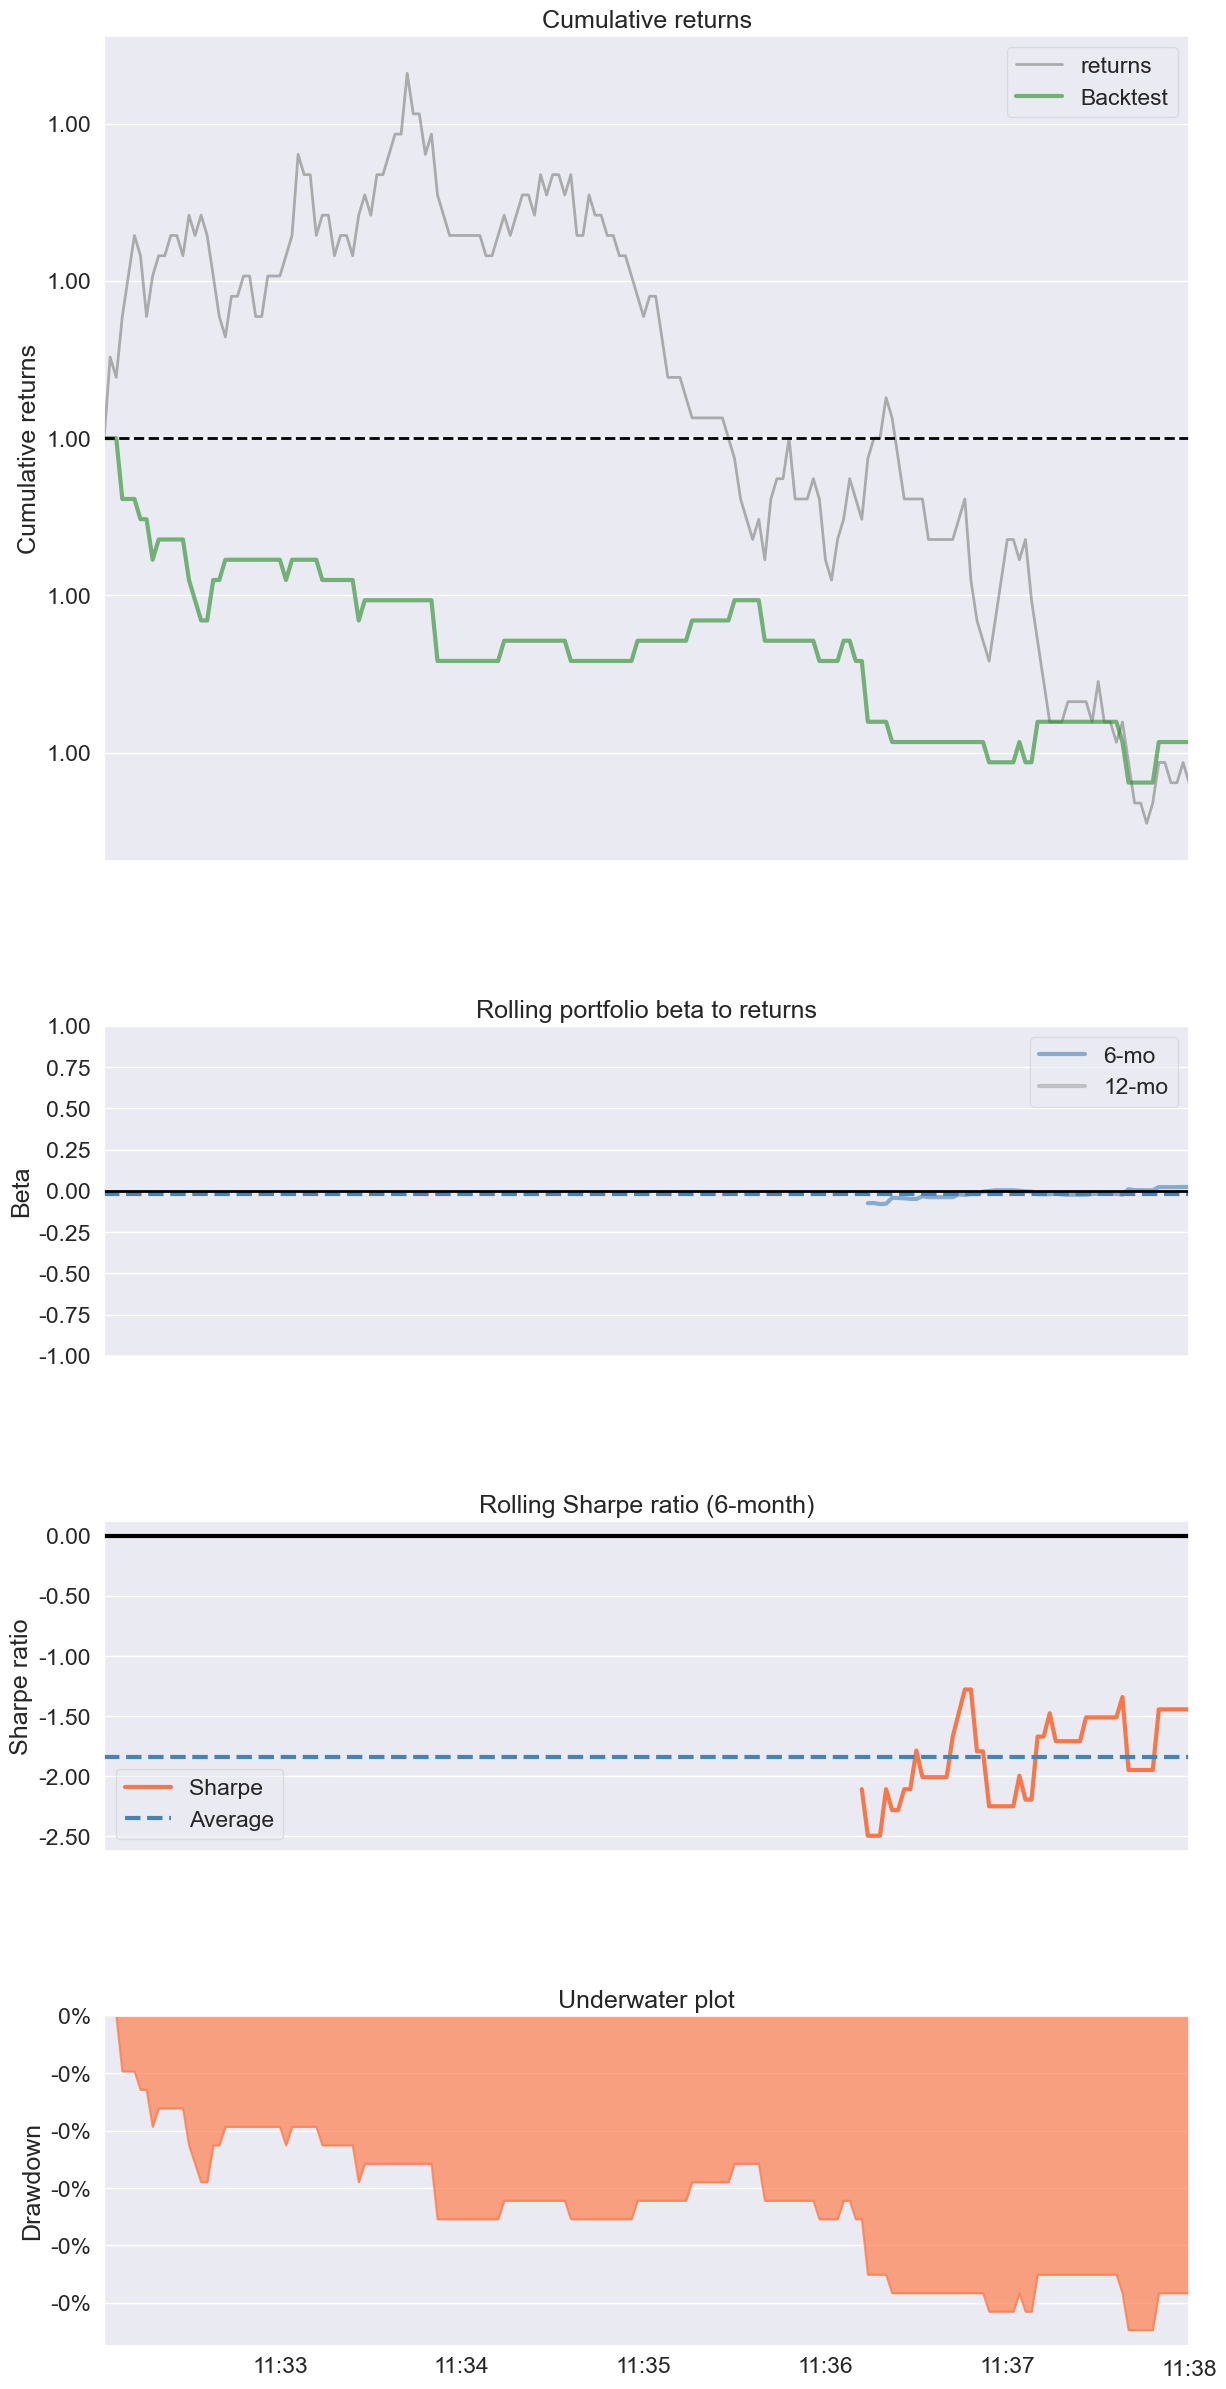

In [263]:
#Checking for NaN values
strategy_data.isna().sum()

# Dropping the NaN values 
strategy_data.dropna(inplace = True)
strategy_data.head()

# Creating pyfolio tear sheet
pf.create_simple_tear_sheet(strategy_data['strategy_returns'], benchmark_rets = strategy_data['returns']) 